In [1]:
import file_reader
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import (ConfusionMatrixDisplay,
                             accuracy_score,
                             f1_score,
                             classification_report,
                             confusion_matrix,
                             explained_variance_score,
                             max_error,
                             mean_absolute_error,
                             mean_squared_error,
                             r2_score)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import (MLPClassifier,
                                    MLPRegressor)

TEST_SIZE = 0.3
RANDOM_STATE = 5
ITERATIONS = 5000
LAYERS = (512, 256, 128, 64, 32, 16, 8, 4, 2)

data = file_reader.read_csv_file('./data/treino_sinais_vitais_com_label.txt')
data

,linha,qPA,pulso,resp,gravid,classe
0,1,8.416754,75.921057,21.635259,40.000000,2
1,2,8.725890,63.813564,19.718734,41.530427,2
2,3,0.000000,197.210213,19.045471,52.730745,3
3,4,8.733333,143.636181,17.621141,34.679911,2
4,5,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...
1495,1496,4.774128,6.701052,7.380529,24.494467,1
1496,1497,8.400144,81.203081,13.630509,65.385011,3
1497,1498,4.768427,143.261527,21.843486,24.530704,1
1498,1499,1.707746,184.267283,14.256125,61.062546,3


## Classificação

In [2]:
#Divisao de testes e treino
x_class = data[['qPA', 'pulso', 'resp']]
y_class = data['classe']
        
xc_train, xc_test, yc_train, yc_test = train_test_split(
    x_class, y_class, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [3]:
modelo = MLPClassifier(hidden_layer_sizes=LAYERS, activation='relu', max_iter=ITERATIONS)
modelo.fit(xc_train, yc_train)

y_class_pred = modelo.predict(xc_test)
accuracy = accuracy_score(yc_test, y_class_pred)

print('Acurácia:', accuracy)
print('F1-score: ', f1_score(yc_test, y_class_pred, average='macro'))

Acurácia: 0.7555555555555555
F1-score:  0.5478915986234714


In [4]:
# Prediction
data['pred classif'] = modelo.predict(x_class)

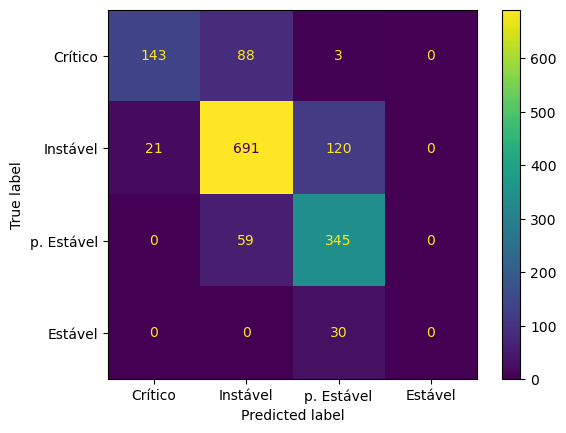

In [5]:
cm = confusion_matrix(data['classe'], data['pred classif'])

cmd = ConfusionMatrixDisplay(
    cm, display_labels=['Crítico', 'Instável', 'p. Estável', 'Estável'])
cmd.plot()
plt.show()

## Regression

In [6]:
#Divisao de testes e treino
x_reg = data[['qPA', 'pulso', 'resp']]
y_reg = data['gravid']
        
xr_train, xr_test, yr_train, yr_test = train_test_split(
    x_reg, y_reg, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [7]:
modelo_r = MLPRegressor(hidden_layer_sizes=LAYERS, activation='relu', max_iter=ITERATIONS)
modelo_r.fit(xr_train, yr_train)

yr_pred = modelo_r.predict(xr_test)

print('R2: ', r2_score(yr_test, yr_pred))
print('MSE: ', mean_squared_error(yr_test, yr_pred))

R2:  0.7021562758409919
MSE:  81.54810715264544


In [8]:
data['pred_reg'] = modelo.predict(x_reg)